In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

# Jupyter Notebookの中でインライン表示する場合の設定（これが無いと別ウィンドウでグラフが開く）
%matplotlib inline

In [5]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## 線形回帰分析での予測
- カラム[OverallQual]と線形回帰分析を用いて学習処理を実施する
- カラム[OverallQual] : Rates the overall material and finish of the house（家全体の材料と仕上げの評価）
- 線形回帰分析の数式 : y = θ0 + θ1X1 + θ2X2 + θ3X3 + .... + θX
- 本処理の数式 : y[SalesPrice] = θ0[y切片] + θ1[傾き] * X1[OverallQual]


In [6]:
# .valuesとするとことで、pandas -> numpyArrayに変換
X = df[["OverallQual"]].values
y = df["SalePrice"].values

# Simple Linear Regression（単回帰）
slr = LinearRegression()

# fit関数でモデル作成
slr.fit(X,y)

# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
# 余談：x切片もあり、それは直線とx軸との交点を指す
print('切片：{}'.format(slr.intercept_))


傾き：45435.80259309935
切片：-96206.07951476009


## 線形回帰から導き出される数式
回帰式（単回帰分析）
$$
\hat{y}_{\text{SalesPrice}} = -96206.0795 \, (\text{切片}) + 45435.8026 \times X_{\text{OverallQual}} \, (\text{傾き})
$$

線形回帰から導き出される数式とデータセットを図示
- plt.scatter(X, y) : 散布図
- plt.plot(X,slr.predict(X),color='red') : 折れ線グラフ


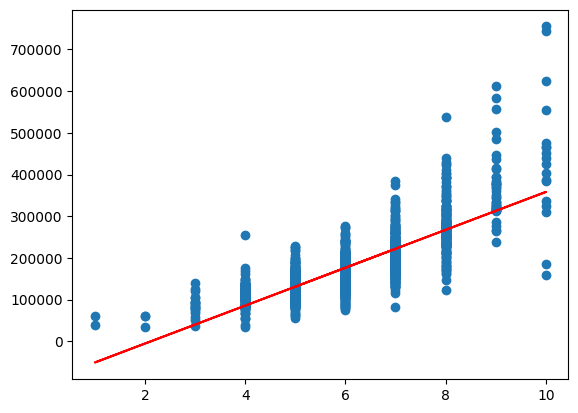

In [7]:
plt.scatter(X, y)
plt.plot(X, slr.predict(X), color='red')
plt.show()

## テストデータを用いて予測
- pandasでデータを読み込む(返り値はSeries)
- 「変数.vlaues」でnumpy arrayに変換
- モデルに使用

In [8]:
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
# テストデータにおけるOverallQuall の値をセットする
X_test = df_test[["OverallQual"]].values

# 学習済みのモデルに予測したいデータをセット
y_test_pred = slr.predict(X_test)
y_test_pred

array([130972.93345074, 176408.73604384, 130972.93345074, ...,
       130972.93345074, 130972.93345074, 221844.53863694])

## 提出

In [10]:
df_test['SalePrice'] = y_test_pred
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,130972.933451
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,176408.736044
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,130972.933451
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,176408.736044
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,267280.341230


In [11]:
df_test[["Id", "SalePrice"]].head()

,Id,SalePrice
0,1461,130972.933451
1,1462,176408.736044
2,1463,130972.933451
3,1464,176408.736044
4,1465,267280.341230


In [12]:
df_test[["Id", "SalePrice"]].to_csv('submission.csv', index=False)

# モデルの改善
## カラムの把握

In [13]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<ipython-input-16-7697db60547c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

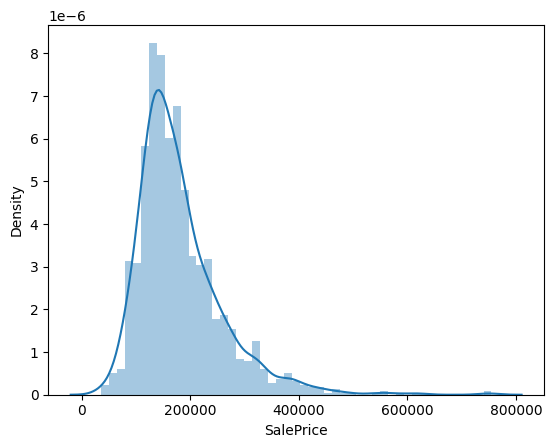

In [16]:
# ヒストグラムを表示
sns.distplot(df.SalePrice)

- 160,000$位のデータの割合が最も多い
- 極端に高い金額のものが存在する
- 正規分布（グラフにした際、大半が中央に集中し、左右対称の釣鐘型に分布するデータ）ではない

### 機械学習における正規分布の効果とは
- 予測しようとしている値が、正規分布に従った方が精度が良くなる

## SalePriceと相関係数の高い上位10個のデータを調査
### 相関係数とは
相関関係を指し示す係数のこと

### 相関関係とは
片方の変数が変化すれば、もう一方の変数も変化するという、2つの変数間の関係性をあらわしているもの

2種類のデータの（直線的な）関係性の強さを −1 から ＋1 の間の値で表しており、 正(+)の相関の場合は、片方の変数が大きくなればもう片方の変数も大きくなり、 負(-)の相関の場合は、片方の変数が大きくなればもう片方の変数も小さくなる

なお、相関関係の強弱については下記の通り

| 相関係数の範囲      | 相関の強さ               |
|---------------------|--------------------------|
| ±0.2 ～ ±0.4         | 弱い相関がある           |
| ±0.4 ～ ±0.7         | 相関がある               |
| ±0.7 ～ ±0.9         | 強い相関がある           |
| ±0.9 ～ ±1.0         | （ほぼ）完全な相関がある |


### 注意点
相関関係は因果関係と同じものではない。疑似相関の場合がある

- 因果関係 : 2つの変数の間に原因と結果の関係があること
- 疑似相関 : 相関係数は高いが、2つの変数の間に因果関係がないこと

In [17]:
# 相関関係を算出
df_number = df.select_dtypes(include='number')
corrmat = df_number.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [18]:
# 算出した相関関係を相関が高い順に上位１０個表示
k = 10

# SalePriceとの相関が大きい上位10個のカラム名を取得
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index

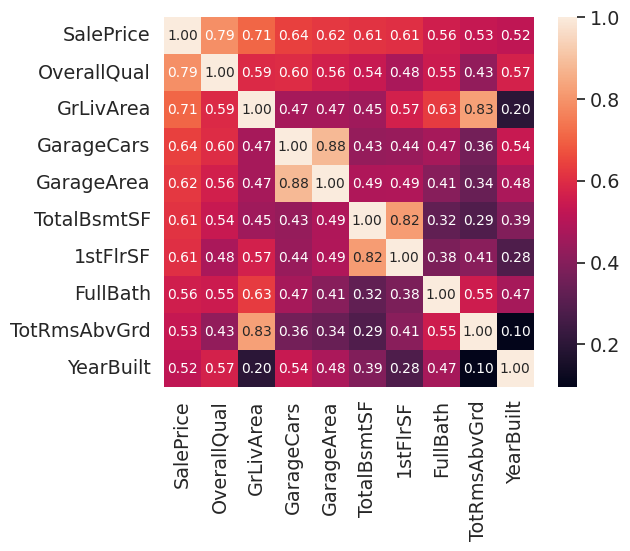

In [19]:
# SalesPriceとの相関が大きい上位10個のカラムを対象に相関を算出
# .T(Trancepose[転置行列])を行う理由は、corrcoefで相関を算出する際に、各カラムの値を行毎にまとめなければならない為
cm = np.corrcoef(df[cols].values.T)

# ヒートマップのフォントサイズを指定
sns.set(font_scale=1.25)

# 算出した相関データをヒートマップで表示
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

ヒートマップからSalePriceと相関が高いのは、OverallQual と GrLivArea だと分かる。

## 相関の強い OverallQual と GrLivArea の散布図の表示¶


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


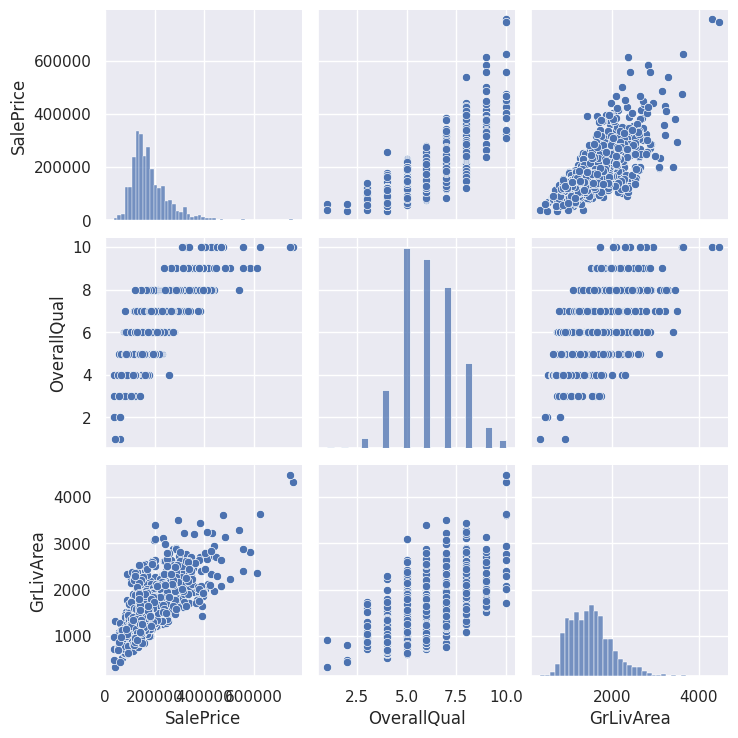

In [35]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea']
sns.pairplot(df[cols], size = 2.5)

一番右上のSalesPriceとGrLivAreaの散布図を見てみると、傾向から大幅に外れているデータが２つ存在。

このデータを不適切な学習データ、もしくは異常値データとみなして削除。

In [21]:
df.sort_values(by = 'GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [22]:
df = df.drop(index = df[df['Id'] == 1299].index)
df = df.drop(index = df[df['Id'] == 524].index)


## GrLivAreaを使用してモデルを学習

In [23]:
X = df[['GrLivArea']].values
y = df["SalePrice"].values

slr = LinearRegression()

slr.fit(X, y)

print('傾き：{}'.format(slr.coef_[0]))
print('切片：{}'.format(slr.intercept_))

傾き：115.03998299377372
切片：7168.969884852442


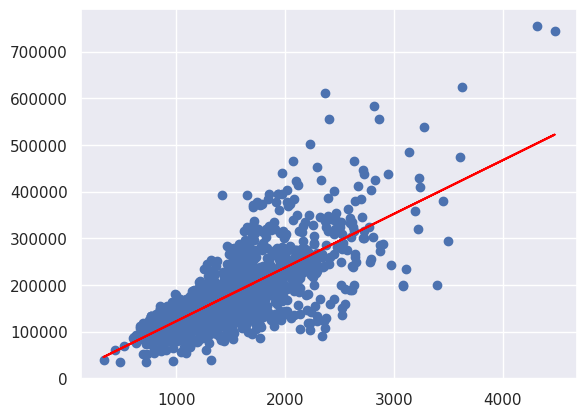

In [24]:
plt.scatter(X,y)
plt.plot(X, slr.predict(X), color="red")

In [25]:
# テストデータの読み込み
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [26]:
X_test = df_test[["GrLivArea"]].values

y_test_pred = slr.predict(X_test)
y_test_pred

array([110244.79464727, 160057.10728358, 194569.10218171, ...,
       147977.90906923, 118757.75338881, 237248.9358724 ])

In [27]:
df_test["SalePrice"] = y_test_pred

In [28]:
df_test[["Id", "SalePrice"]]

,Id,SalePrice
0,1461,110244.794647
1,1462,160057.107284
2,1463,194569.102182
3,1464,191693.102607
4,1465,154420.148117
...,...,...
1454,2915,132792.631314
1455,2916,132792.631314
1456,2917,147977.909069
1457,2918,118757.753389


## 重回帰分析の採用
SalePriceと相関の高いOverallQualとGrLivAreaを説明変数に使用

In [48]:
X = df[["OverallQual", "GrLivArea"]].values
y = df["SalePrice"].values

slr = LinearRegression()

slr.fit(X, y)

print('傾き： {}'.format(slr.coef_))
a1, a2 = slr.coef_

print('y切片： {}'.format(slr.intercept_))
b = slr.intercept_

傾き： [4490.49421484    6.26928957]
y切片： 245783.2924393564


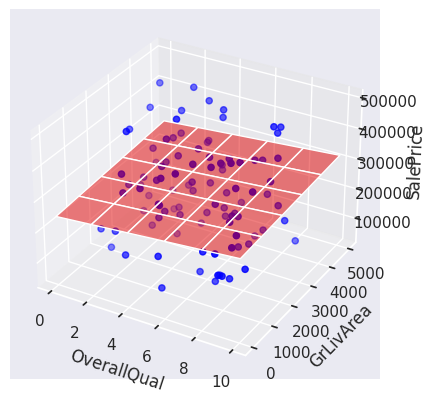

In [50]:
# 3Dプロット（散布図）
x, y, z = df["OverallQual"], df["GrLivArea"], df["SalePrice"]

fig = plt.figure()
# 3Dグラフを描画するための軸をFigureに追加
# 111: 1行1列のグリッドの中の一番の位置にプロットを作成
# projection='3d': 3Dグラフを描画
ax = fig.add_subplot(111, projection='3d')

# 散布図
ax.scatter(x, y, z, c='blue', marker='o')

# ３Dプロット（回帰平面）
X, Y = np.meshgrid(np.arange(0, 12, 2), np.arange(0, 6000, 1000))
Z = a1 * X + a2 * Y + b
ax.plot_surface(X, Y, Z, color='red', alpha=0.5) # alphaで透明度を調整

# 軸ラベル
ax.set_xlabel("OverallQual")
ax.set_ylabel("GrLivArea")
ax.set_zlabel("SalePrice")

plt.show()

In [52]:
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [57]:
x_test = df_test[["OverallQual", "GrLivArea"]].values
y_test_pred = slr.predict(x_test)
y_test_pred

array([273853.04696841, 281058.14356712, 278448.43622332, ...,
       275909.37394741, 274316.9743966 , 289755.33108352])

In [59]:
df_test["SalePrice"] = y_test_pred

In [60]:
df_test[["Id", "SalePrice"]].head()

,Id,SalePrice
0,1461,273853.046968
1,1462,281058.143567
2,1463,278448.436223
3,1464,282782.198199
4,1465,289731.936808


In [63]:
df_test[["Id", "SalePrice"]].to_csv('./house-prices-advanced-regression-techniques/submission.csv', index=False)